# Neural Network Optimization

## Gradient Descent Algorithm


Gradient Descent is an optimization algorithm used to minimize a function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. It's widely used in machine learning to update parameters of models.

Mathematical Explanation:

Given a function $ f(\theta) $ where $ \theta $ represents the parameters, the goal is to find $ \theta $ that minimizes $ f(\theta) $.

Update Rule:

$$
\theta_{\text{new}} = \theta_{\text{old}} - \eta \nabla_{\theta} f(\theta_{\text{old}})
$$

- $ \eta $ is the learning rate (a small positive number).
- $ \nabla_{\theta} f(\theta_{\text{old}}) $ is the gradient of the function at $ \theta_{\text{old}} $.

Visual Illustration:

Imagine you're at the top of a hill (the maximum of the function), and you want to get to the bottom (the minimum). At each step, you look around for the steepest downward slope (the negative gradient) and take a step in that direction.


## Stochastic Gradient Descent (SGD)

Stochastic Gradient Descent is a variation of gradient descent where the gradient is estimated using a single sample (or a mini-batch) rather than the entire dataset. This makes it computationally efficient and allows it to handle large datasets.

Update Rule:

$$
\theta_{\text{new}} = \theta_{\text{old}} - \eta \nabla_{\theta} f(\theta_{\text{old}}; x_i, y_i)
$$

- $ (x_i, y_i) $ is a single data point.
- The gradient $ \nabla_{\theta} f(\theta_{\text{old}}; x_i, y_i) $ is computed using only this data point.

Benefits of SGD:

- Faster iterations due to less computation per update.
- Introduces noise that can help escape local minima.

---

### Example: Linear Regression with Gradient Descent

Suppose we have a dataset:

| $ x_i $ | $ y_i $ |
|-----------|-----------|
|     1     |     2     |
|     2     |     4     |
|     3     |     6     |
|     4     |     8     |

We want to fit a linear model $ y = w x + b $ using gradient descent.

Loss Function (Mean Squared Error):

$$
L(w, b) = \frac{1}{N} \sum_{i=1}^{N} (y_i - (w x_i + b))^2
$$

Compute Gradients:

- Gradient with respect to $ w $:

  $$
  \frac{\partial L}{\partial w} = -\frac{2}{N} \sum_{i=1}^{N} x_i (y_i - (w x_i + b))
  $$

- Gradient with respect to $ b $:

  $$
  \frac{\partial L}{\partial b} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - (w x_i + b))
  $$

Update Rules:

$$
\begin{align*}
w_{\text{new}} & = w_{\text{old}} - \eta \frac{\partial L}{\partial w} \\
b_{\text{new}} & = b_{\text{old}} - \eta \frac{\partial L}{\partial b}
\end{align*}
$$

Step-by-Step Calculation:

Let's initialize $ w = 0 $, $ b = 0 $, and $ \eta = 0.01 $.

First Iteration:

1. Compute predictions:

   $$
   \hat{y}_i = w x_i + b = 0 \times x_i + 0 = 0
   $$

2. Compute gradients:

   $$
   \frac{\partial L}{\partial w} = -\frac{2}{4} \sum_{i=1}^{4} x_i (y_i - \hat{y}_i) = -\frac{1}{2} \sum_{i=1}^{4} x_i y_i
   $$

   $$
   \frac{\partial L}{\partial b} = -\frac{2}{4} \sum_{i=1}^{4} (y_i - \hat{y}_i) = -\frac{1}{2} \sum_{i=1}^{4} y_i
   $$

3. Calculate sums:

   $$
   \sum_{i=1}^{4} x_i y_i = 1 \times 2 + 2 \times 4 + 3 \times 6 + 4 \times 8 = 60
   $$

   $$
   \sum_{i=1}^{4} y_i = 2 + 4 + 6 + 8 = 20
   $$

4. Compute gradients:

   $$
   \frac{\partial L}{\partial w} = -\frac{1}{2} \times 60 = -30
   $$

   $$
   \frac{\partial L}{\partial b} = -\frac{1}{2} \times 20 = -10
   $$

5. Update parameters:

   $$
   w_{\text{new}} = 0 - 0.01 \times (-30) = 0 + 0.3 = 0.3
   $$

   $$
   b_{\text{new}} = 0 - 0.01 \times (-10) = 0 + 0.1 = 0.1
   $$

Final Thoughts:

- Gradient Descent is suitable for smaller datasets where computational efficiency is not a concern.
- Stochastic Gradient Descent is better for larger datasets and can help in escaping local minima due to its stochastic nature.


In [5]:
import torch

# Data
x = torch.tensor([1.0, 2.0, 3.0, 4.0])
y = torch.tensor([2.0, 4.0, 6.0, 8.0])

# Parameters
w = torch.tensor(0.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

# Learning rate
eta = 0.01

# Number of epochs
epochs = 100

for epoch in range(epochs):
    # Forward pass: compute predicted y
    y_pred = w * x + b
    # Compute and print loss
    loss = ((y_pred - y) ** 2).mean()
    # Backward pass
    loss.backward()
    # Update parameters
    with torch.no_grad():
        w -= eta * w.grad
        b -= eta * b.grad
    # Zero gradients
    w.grad.zero_()
    b.grad.zero_()
    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}: w = {w.item():.4f}, b = {b.item():.4f}, Loss = {loss.item():.4f}')

Epoch 10: w = 1.5104, b = 0.4936, Loss = 1.1751
Epoch 20: w = 1.7583, b = 0.5584, Loss = 0.0843
Epoch 30: w = 1.8030, b = 0.5547, Loss = 0.0529
Epoch 40: w = 1.8149, b = 0.5404, Loss = 0.0492
Epoch 50: w = 1.8213, b = 0.5248, Loss = 0.0463
Epoch 60: w = 1.8267, b = 0.5093, Loss = 0.0436
Epoch 70: w = 1.8319, b = 0.4943, Loss = 0.0410
Epoch 80: w = 1.8369, b = 0.4797, Loss = 0.0387
Epoch 90: w = 1.8417, b = 0.4655, Loss = 0.0364
Epoch 100: w = 1.8463, b = 0.4518, Loss = 0.0343


In [6]:

import torch

# Data
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

# Parameters
w = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Learning rate
eta = 0.01

# Number of epochs
epochs = 100

for epoch in range(epochs):
    permutation = torch.randperm(x.size()[0])
    for i in permutation:
        xi = x[i]
        yi = y[i]
        # Forward pass
        y_pred = xi @ w + b
        # Compute loss
        loss = (y_pred - yi).pow(2).mean()
        # Backward pass
        loss.backward()
        # Update parameters
        with torch.no_grad():
            w -= eta * w.grad
            b -= eta * b.grad
        # Zero gradients
        w.grad.zero_()
        b.grad.zero_()
    # Print progress
    if (epoch + 1) % 10 == 0:
        # Compute total loss
        y_pred = x @ w + b
        loss = (y_pred - y).pow(2).mean()
        print(f'Epoch {epoch+1}: w = {w.item():.4f}, b = {b.item():.4f}, Loss = {loss.item():.4f}')

Epoch 10: w = 1.9437, b = 0.1718, Loss = 0.0049
Epoch 20: w = 1.9503, b = 0.1516, Loss = 0.0038
Epoch 30: w = 1.9554, b = 0.1333, Loss = 0.0030
Epoch 40: w = 1.9613, b = 0.1178, Loss = 0.0023
Epoch 50: w = 1.9648, b = 0.1036, Loss = 0.0018
Epoch 60: w = 1.9693, b = 0.0914, Loss = 0.0014
Epoch 70: w = 1.9733, b = 0.0807, Loss = 0.0011
Epoch 80: w = 1.9762, b = 0.0711, Loss = 0.0008
Epoch 90: w = 1.9792, b = 0.0628, Loss = 0.0007
Epoch 100: w = 1.9809, b = 0.0551, Loss = 0.0005


## Advanced gradient descent methods
While basic Gradient Descent and Stochastic Gradient Descent (SGD) are foundational optimization algorithms in machine learning, they have limitations such as slow convergence and sensitivity to the choice of learning rate. To address these issues, advanced optimization algorithms have been developed. These methods aim to accelerate convergence, adapt learning rates, and improve overall performance.

Below, we'll explore several advanced gradient descent methods:

- Learning Rate Scheduling
- Nesterov Momentum
- AdaGrad
- AdaDelta
- RMSprop
- Adam



### Learning Rate Scheduling

Learning rate scheduling involves changing the learning rate ($ \eta $) during training to improve convergence. A high learning rate can help escape local minima, while a low learning rate can fine-tune the parameters.

Common Schedules:

- **Time-based Decay:**

  $$
  \eta_t = \frac{\eta_0}{1 + k t}
  $$

- **Step Decay:**

  Reduce $ \eta $ by a factor every few epochs.

- **Exponential Decay:**

  $$
  \eta_t = \eta_0 e^{-k t}
  $$

- **Cosine Annealing:**

  Uses a cosine function to adjust $ \eta $.

**Example:**

We'll use the same linear regression problem as before but implement a time-based decay learning rate.

- **Learning Rate Update:**

  $$
  \eta_t = \frac{\eta_0}{1 + k t}
  $$

  - $ \eta_0 $: Initial learning rate
  - $ k $: Decay rate
  - $ t $: Current epoch

**Explanation:**

- We update the learning rate at each epoch based on the time-based decay formula.
- The learning rate decreases over time, allowing larger steps initially and smaller steps as we approach the minimum.

In [8]:
import torch

# Data
x = torch.tensor([1.0, 2.0, 3.0, 4.0])
y = torch.tensor([2.0, 4.0, 6.0, 8.0])

# Parameters
w = torch.tensor(0.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

# Initial learning rate and decay rate
eta_0 = 0.1
k = 0.01

# Number of epochs
epochs = 100

for epoch in range(epochs):
    # Update learning rate
    eta = eta_0 / (1 + k * epoch)
    
    # Forward pass
    y_pred = w * x + b
    loss = ((y_pred - y) ** 2).mean()
    
    # Backward pass
    loss.backward()
    
    # Update parameters
    with torch.no_grad():
        w -= eta * w.grad
        b -= eta * b.grad
    
    # Zero gradients
    w.grad.zero_()
    b.grad.zero_()
    
    # Print progress every 100 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}, Learning Rate: {eta:.4f}, Loss: {loss.item():.4f}, w: {w.item():.4f}, b: {b.item():.4f}')

Epoch 10, Learning Rate: 0.0917, Loss: 0.0403, w: 1.8345, b: 0.4523
Epoch 20, Learning Rate: 0.0840, Loss: 0.0215, w: 1.8811, b: 0.3497
Epoch 30, Learning Rate: 0.0775, Loss: 0.0131, w: 1.9068, b: 0.2741
Epoch 40, Learning Rate: 0.0719, Loss: 0.0084, w: 1.9256, b: 0.2188
Epoch 50, Learning Rate: 0.0671, Loss: 0.0055, w: 1.9396, b: 0.1775
Epoch 60, Learning Rate: 0.0629, Loss: 0.0037, w: 1.9504, b: 0.1459
Epoch 70, Learning Rate: 0.0592, Loss: 0.0026, w: 1.9587, b: 0.1214
Epoch 80, Learning Rate: 0.0559, Loss: 0.0018, w: 1.9653, b: 0.1021
Epoch 90, Learning Rate: 0.0529, Loss: 0.0013, w: 1.9705, b: 0.0867
Epoch 100, Learning Rate: 0.0503, Loss: 0.0009, w: 1.9747, b: 0.0742


### Nesterov Momentum

Momentum methods accelerate gradient descent by moving in the direction of the accumulated gradients (momentum). Nesterov Momentum is a variant that looks ahead by calculating the gradient at the approximate future position.


- **Velocity Update:**

  $$
  v_t = \gamma v_{t-1} + \eta \nabla_{\theta} f(\theta_t - \gamma v_{t-1})
  $$

- **Parameter Update:**

  $$
  \theta_{t+1} = \theta_t - v_t
  $$

  - $ \gamma $: Momentum coefficient (e.g., 0.9)
  - $ v_t $: Velocity at time $ t $


**Explanation:**

- **Lookahead Parameters:** We compute the gradient at the approximate future position.
- **Velocity Update:** Combines momentum and gradient information.
- **Parameter Update:** Parameters are updated using the new velocities.


In [11]:

# Data
x = torch.tensor([1.0, 2.0, 3.0, 4.0])
y = torch.tensor([2.0, 4.0, 6.0, 8.0])

# Parameters
w = torch.tensor(0.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

# Hyperparameters
eta = 0.01
gamma = 0.9

# Initialize velocities
v_w = 0.0
v_b = 0.0

# Number of epochs
epochs = 100

for epoch in range(epochs):
    # Lookahead parameters
    w_lookahead = w - gamma * v_w
    b_lookahead = b - gamma * v_b

    # Forward pass with lookahead
    y_pred = w_lookahead * x + b_lookahead
    loss = ((y_pred - y) ** 2).mean()

    # Backward pass
    loss.backward()

    # Update velocities
    v_w = gamma * v_w + eta * w.grad
    v_b = gamma * v_b + eta * b.grad

    # Update parameters
    with torch.no_grad():
        w -= v_w
        b -= v_b

    # Zero gradients
    w.grad.zero_()
    b.grad.zero_()

    # Print progress every 100 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}, w: {w.item():.4f}, b: {b.item():.4f}')

Epoch 10, Loss: 0.9508, w: 2.0767, b: 0.6248
Epoch 20, Loss: 0.0479, w: 1.8983, b: 0.4240
Epoch 30, Loss: 0.0218, w: 1.8772, b: 0.2832
Epoch 40, Loss: 0.0066, w: 1.9369, b: 0.1972
Epoch 50, Loss: 0.0027, w: 1.9573, b: 0.1270
Epoch 60, Loss: 0.0011, w: 1.9726, b: 0.0795
Epoch 70, Loss: 0.0004, w: 1.9835, b: 0.0487
Epoch 80, Loss: 0.0001, w: 1.9901, b: 0.0291
Epoch 90, Loss: 0.0000, w: 1.9942, b: 0.0170
Epoch 100, Loss: 0.0000, w: 1.9967, b: 0.0097


### AdaGrad

AdaGrad adapts the learning rate for each parameter individually based on the historical gradients. Parameters with large gradients have their learning rates reduced, while those with small gradients have their learning rates increased.

- **Accumulator Update:**

  $$
  s_t = s_{t-1} + (\nabla_{\theta} f(\theta_t))^2
  $$

- **Parameter Update:**

  $$
  \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{s_t + \epsilon}} \nabla_{\theta} f(\theta_t)
  $$

  - $ s_t $: Sum of squares of gradients
  - $ \epsilon $: Small constant to prevent division by zero (e.g., $ 1e^{-8} $)


**Explanation:**

- **Accumulators $ s_w $ and $ s_b $:** Keep track of the sum of squared gradients.
- **Adaptive Learning Rate:** Adjusted for each parameter based on its historical gradients.



In [12]:
import torch

# Data
x = torch.tensor([1.0, 2.0, 3.0, 4.0])
y = torch.tensor([2.0, 4.0, 6.0, 8.0])

# Parameters
w = torch.tensor(0.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

# Hyperparameters
eta = 1.0  # Higher initial learning rate
epsilon = 1e-8

# Accumulators
s_w = 0.0
s_b = 0.0

# Number of epochs
epochs = 100

for epoch in range(epochs):
    # Forward pass
    y_pred = w * x + b
    loss = ((y_pred - y) ** 2).mean()
    
    # Backward pass
    loss.backward()
    
    # Update accumulators
    s_w += w.grad.data ** 2
    s_b += b.grad.data ** 2
    
    # Update parameters
    with torch.no_grad():
        w -= (eta / (torch.sqrt(s_w) + epsilon)) * w.grad
        b -= (eta / (torch.sqrt(s_b) + epsilon)) * b.grad
    
    # Zero gradients
    w.grad.zero_()
    b.grad.zero_()
    
    # Print progress every 100 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}, w: {w.item():.4f}, b: {b.item():.4f}')

Epoch 10, Loss: 0.2610, w: 1.5741, b: 1.2138
Epoch 20, Loss: 0.1626, w: 1.6639, b: 0.9581
Epoch 30, Loss: 0.1014, w: 1.7346, b: 0.7565
Epoch 40, Loss: 0.0632, w: 1.7904, b: 0.5975
Epoch 50, Loss: 0.0395, w: 1.8344, b: 0.4721
Epoch 60, Loss: 0.0246, w: 1.8692, b: 0.3730
Epoch 70, Loss: 0.0154, w: 1.8966, b: 0.2947
Epoch 80, Loss: 0.0096, w: 1.9183, b: 0.2329
Epoch 90, Loss: 0.0060, w: 1.9355, b: 0.1840
Epoch 100, Loss: 0.0037, w: 1.9490, b: 0.1454


### AdaDelta


AdaDelta addresses the diminishing learning rates in AdaGrad by restricting the window of accumulated past gradients to some fixed size.

**Mathematical Formulation:**

- **Accumulator Update:**

  $$
  E[g^2]_t = \rho E[g^2]_{t-1} + (1 - \rho) (\nabla_{\theta} f(\theta_t))^2
  $$

- **Parameter Update:**

  $$
  \Delta \theta_t = - \frac{\sqrt{E[\Delta \theta^2]_{t-1} + \epsilon}}{\sqrt{E[g^2]_t + \epsilon}} \nabla_{\theta} f(\theta_t)
  $$

- **Accumulator for Parameter Updates:**

  $$
  E[\Delta \theta^2]_t = \rho E[\Delta \theta^2]_{t-1} + (1 - \rho) (\Delta \theta_t)^2
  $$

  - $ \rho $: Decay rate (e.g., 0.9)

**PyTorch Implementation:**

```python
import torch

# Data
x = torch.tensor([1.0, 2.0, 3.0, 4.0])
y = torch.tensor([2.0, 4.0, 6.0, 8.0])

# Parameters
w = torch.tensor(0.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

# Hyperparameters
rho = 0.9
epsilon = 1e-6

# Accumulators
E_w_grad = 0.0
E_b_grad = 0.0
E_w_delta = 0.0
E_b_delta = 0.0

# Number of epochs
epochs = 1000

for epoch in range(epochs):
    # Forward pass
    y_pred = w * x + b
    loss = ((y_pred - y) ** 2).mean()
    
    # Backward pass
    loss.backward()
    
    # Accumulate gradients
    E_w_grad = rho * E_w_grad + (1 - rho) * w.grad.data ** 2
    E_b_grad = rho * E_b_grad + (1 - rho) * b.grad.data ** 2
    
    # Compute update
    delta_w = - (torch.sqrt(E_w_delta + epsilon) / torch.sqrt(E_w_grad + epsilon)) * w.grad.data
    delta_b = - (torch.sqrt(E_b_delta + epsilon) / torch.sqrt(E_b_grad + epsilon)) * b.grad.data
    
    # Accumulate updates
    E_w_delta = rho * E_w_delta + (1 - rho) * delta_w ** 2
    E_b_delta = rho * E_b_delta + (1 - rho) * delta_b ** 2
    
    # Update parameters
    with torch.no_grad():
        w += delta_w
        b += delta_b
    
    # Zero gradients
    w.grad.zero_()
    b.grad.zero_()
    
    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}, w: {w.item():.4f}, b: {b.item():.4f}')
```

**Explanation:**

- **Exponential Moving Averages:** Both the squared gradients and squared parameter updates are tracked.
- **Adaptive Updates:** The parameter updates are scaled based on the ratio of accumulated updates to accumulated gradients.

---

### RMSprop

RMSprop is similar to AdaDelta and aims to resolve AdaGrad's diminishing learning rates by using a moving average of squared gradients.

**Mathematical Formulation:**

- **Accumulator Update:**

  $$
  E[g^2]_t = \rho E[g^2]_{t-1} + (1 - \rho) (\nabla_{\theta} f(\theta_t))^2
  $$

- **Parameter Update:**

  $$
  \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} \nabla_{\theta} f(\theta_t)
  $$

**PyTorch Implementation:**

```python
import torch

# Data
x = torch.tensor([1.0, 2.0, 3.0, 4.0])
y = torch.tensor([2.0, 4.0, 6.0, 8.0])

# Parameters
w = torch.tensor(0.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

# Hyperparameters
eta = 0.01
rho = 0.9
epsilon = 1e-6

# Accumulators
E_w_grad = 0.0
E_b_grad = 0.0

# Number of epochs
epochs = 1000

for epoch in range(epochs):
    # Forward pass
    y_pred = w * x + b
    loss = ((y_pred - y) ** 2).mean()
    
    # Backward pass
    loss.backward()
    
    # Accumulate squared gradients
    E_w_grad = rho * E_w_grad + (1 - rho) * w.grad.data ** 2
    E_b_grad = rho * E_b_grad + (1 - rho) * b.grad.data ** 2
    
    # Update parameters
    with torch.no_grad():
        w -= (eta / (torch.sqrt(E_w_grad + epsilon))) * w.grad
        b -= (eta / (torch.sqrt(E_b_grad + epsilon))) * b.grad
    
    # Zero gradients
    w.grad.zero_()
    b.grad.zero_()
    
    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}, w: {w.item():.4f}, b: {b.item():.4f}')
```

**Explanation:**

- **Exponential Moving Average of Squared Gradients:** Helps in adapting the learning rate.
- **Parameter Update:** Similar to AdaGrad but with a moving average to prevent the learning rate from becoming too small.

---

###  Adam (Adaptive Moment Estimation)

Adam combines ideas from both Momentum and RMSprop. It keeps an exponentially decaying average of past gradients (momentum) and squared gradients (adaptive learning rates).

**Mathematical Formulation:**

- **First Moment Estimate (Mean):**

  $$
  m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla_{\theta} f(\theta_t)
  $$

- **Second Moment Estimate (Variance):**

  $$
  v_t = \beta_2 v_{t-1} + (1 - \beta_2) (\nabla_{\theta} f(\theta_t))^2
  $$

- **Bias Correction:**

  $$
  \hat{m}_t = \frac{m_t}{1 - \beta_1^t}
  $$
  
  $$
  \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
  $$

- **Parameter Update:**

  $$
  \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t
  $$

  - $ \beta_1 $: Decay rate for the first moment (e.g., 0.9)
  - $ \beta_2 $: Decay rate for the second moment (e.g., 0.999)
  - $ \epsilon $: Small constant to prevent division by zero (e.g., $ 1e^{-8} $)

**PyTorch Implementation:**

```python
import torch

# Data
x = torch.tensor([1.0, 2.0, 3.0, 4.0])
y = torch.tensor([2.0, 4.0, 6.0, 8.0])

# Parameters
w = torch.tensor(0.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

# Hyperparameters
eta = 0.1
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Initialize moment estimates
m_w = 0.0
v_w = 0.0
m_b = 0.0
v_b = 0.0

# Time step
t = 0

# Number of epochs
epochs = 1000

for epoch in range(epochs):
    t += 1

    # Forward pass
    y_pred = w * x + b
    loss = ((y_pred - y) ** 2).mean()

    # Backward pass
    loss.backward()

    # Update biased first moment estimate
    m_w = beta1 * m_w + (1 - beta1) * w.grad.data
    m_b = beta1 * m_b + (1 - beta1) * b.grad.data

    # Update biased second raw moment estimate
    v_w = beta2 * v_w + (1 - beta2) * (w.grad.data ** 2)
    v_b = beta2 * v_b + (1 - beta2) * (b.grad.data ** 2)

    # Compute bias-corrected first moment estimate
    m_w_hat = m_w / (1 - beta1 ** t)
    m_b_hat = m_b / (1 - beta1 ** t)

    # Compute bias-corrected second raw moment estimate
    v_w_hat = v_w / (1 - beta2 ** t)
    v_b_hat = v_b / (1 - beta2 ** t)

    # Update parameters
    with torch.no_grad():
        w -= (eta / (torch.sqrt(v_w_hat) + epsilon)) * m_w_hat
        b -= (eta / (torch.sqrt(v_b_hat) + epsilon)) * m_b_hat

    # Zero gradients
    w.grad.zero_()
    b.grad.zero_()

    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.6f}, w: {w.item():.4f}, b: {b.item():.4f}')
```

**Explanation:**

- **First Moment (Mean):** Tracks the average of the gradients (momentum).
- **Second Moment (Variance):** Tracks the average of the squared gradients (adaptive learning rate).
- **Bias Correction:** Adjusts the estimates to account for their initialization at zero.
- **Parameter Update:** Combines both momentum and adaptive learning rate for efficient optimization.

---

**Understanding the Need for Advanced Methods**

- **Adaptive Learning Rates:** Methods like AdaGrad, AdaDelta, RMSprop, and Adam adjust the learning rate for each parameter based on the historical gradients. This is crucial when dealing with sparse data or when different parameters require different learning rates.

- **Momentum:** Nesterov Momentum and Adam incorporate momentum to accelerate convergence, especially in regions with small but consistent gradients.

- **Avoiding Diminishing Learning Rates:** AdaDelta and RMSprop address the problem of AdaGrad's learning rate shrinking too much, ensuring that learning continues throughout training.

**Final Thoughts**

Advanced gradient descent methods are essential for training deep neural networks efficiently. They help in faster convergence, escaping local minima, and adapting to the complexities of different datasets. Understanding these algorithms enables practitioners to choose the right optimizer for their specific problem.

Feel free to experiment with the provided PyTorch code to observe how each optimizer affects the training process.

## Regularization

Regularization techniques are crucial in training neural networks as they help prevent overfitting, improve generalization, and stabilize the learning process. Overfitting occurs when a model learns the training data too well, including its noise, leading to poor performance on unseen data. Regularization introduces additional information or constraints to encourage simpler models that generalize better.

we'll delve into three common regularization methods:

1. **L1 and L2 Regularization**
2. **Dropout**
3. **Batch Normalization**

### L1 and L2 Regularization

#### L2 Regularization (Weight Decay)

- Objective: Penalize large weights to encourage the network to keep weights small.
- Modified Loss Function:

$$
  L_{\text{new}} = L_{\text{original}} + \lambda \sum_{i} w_{i}^{2}
$$

  where:
  - $ L_{\text{original}} $ is the original loss (e.g., Mean Squared Error).
  - $ \lambda $ is the regularization parameter controlling the penalty strength.
  - $ w_{i} $ are the model weights.

- **Gradient Update:**

  The gradient of the regularized loss w.r.t weights includes an additional term:

$$
  \frac{\partial L_{\text{new}}}{\partial w_{i}} = \frac{\partial L_{\text{original}}}{\partial w_{i}} + 2\lambda w_{i}
 $$

  This leads to a "weight decay" effect during optimization.

**Example:**

Consider a linear regression model:

$$
y = w_{1} x_{1} + w_{2} x_{2} + b
$$

With L2 regularization, the model aims to minimize:

$$
L_{\text{new}} = (y_{\text{true}} - y_{\text{pred}})^{2} + \lambda (w_{1}^{2} + w_{2}^{2})
$$

This penalizes large weights, leading to a smoother model.

#### **L1 Regularization**

**Mathematical Explanation:**

- **Objective:** Promote sparsity in weights, effectively performing feature selection.
- **Modified Loss Function:**

$$
  L_{\text{new}} = L_{\text{original}} + \lambda \sum_{i} |w_{i}|
 $$

- **Gradient Update:**

$$
  \frac{\partial L_{\text{new}}}{\partial w_{i}} = \frac{\partial L_{\text{original}}}{\partial w_{i}} + \lambda \cdot \text{sign}(w_{i})
 $$

  This encourages weights to become exactly zero.

**Toy Example:**

Using the same linear regression model, L1 regularization modifies the loss to:

$$
L_{\text{new}} = (y_{\text{true}} - y_{\text{pred}})^{2} + \lambda (|w_{1}| + |w_{2}|)
$$

Weights that contribute less to minimizing the loss are driven to zero, simplifying the model.



###  Dropout

**Mathematical Explanation:**

- **Objective:** Prevent co-adaptation of neurons by randomly dropping units during training.
- **Mechanism:**

  - During each training iteration, each neuron (along with its connections) is kept with probability $ p $ or dropped with probability $ 1 - p $.
  - Effectively trains an ensemble of subnetworks and averages their predictions.

**Toy Example:**

Consider a neural network layer with neurons $ n_{1}, n_{2}, n_{3} $. During one iteration:

- Neuron $ n_{2} $ is dropped (set to zero).
- The network computes output using only $ n_{1} $ and $ n_{3} $.
- In the next iteration, different neurons may be dropped.

This randomness forces the network to learn redundant representations, enhancing robustness.


###  Batch Normalization

**Mathematical Explanation:**

- **Objective:** Normalize inputs of each layer to stabilize and accelerate training.
- **Process:**

  For a mini-batch $ B = \{ x_{1}, x_{2}, ..., x_{m} \} $:

  1. **Compute Mean and Variance:**

   $$
     \mu_{B} = \frac{1}{m} \sum_{i=1}^{m} x_{i} \\
     \sigma_{B}^{2} = \frac{1}{m} \sum_{i=1}^{m} (x_{i} - \mu_{B})^{2}
    $$

  2. **Normalize:**

   $$
     \hat{x}_{i} = \frac{x_{i} - \mu_{B}}{\sqrt{\sigma_{B}^{2} + \epsilon}}
    $$

     where $ \epsilon $ is a small constant to prevent division by zero.

  3. **Scale and Shift:**

   $$
     y_{i} = \gamma \hat{x}_{i} + \beta
    $$

     $ \gamma $ and $ \beta $ are learnable parameters.

- **Benefits:**

  - Reduces internal covariate shift.
  - Allows for higher learning rates.
  - Acts as a form of regularization due to mini-batch noise.

**Toy Example:**

In training, inputs to a layer vary due to parameter updates in previous layers. Batch normalization standardizes these inputs, making the optimization landscape smoother and improving convergence.

---

### **Implementing Regularization Techniques in PyTorch**

We'll create a simple neural network for a classification task using the MNIST dataset and apply each regularization method.

#### **Setup**

```python
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
```

#### **Data Loading**

```python
# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Data Loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)
```

#### **Model Definition**

We'll define a simple feedforward neural network and demonstrate how to incorporate each regularization technique.

##### **Without Regularization**

```python
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

model = SimpleNN()
```

#### **1. Adding L2 Regularization**

PyTorch optimizers have a `weight_decay` parameter that applies L2 regularization.

```python
# L2 Regularization with weight_decay
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-4)
```

**Training Loop with L2 Regularization**

```python
criterion = nn.CrossEntropyLoss()

for epoch in range(10):
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
```

#### **2. Adding L1 Regularization**

PyTorch does not have built-in support for L1 regularization, so we manually add the L1 penalty to the loss.

```python
# L1 Regularization parameter
l1_lambda = 1e-5
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(10):
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        
        # L1 Regularization
        l1_norm = sum(p.abs().sum() for p in model.parameters())
        loss = loss + l1_lambda * l1_norm
        
        loss.backward()
        optimizer.step()
```

#### **3. Adding Dropout**

We modify the model to include `nn.Dropout` layers.

```python
class DropoutNN(nn.Module):
    def __init__(self):
        super(DropoutNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        return out

model = DropoutNN()
optimizer = optim.SGD(model.parameters(), lr=0.01)
```

**Training Loop with Dropout**

Same as before, but now the model includes dropout layers.

#### **4. Adding Batch Normalization**

We insert `nn.BatchNorm1d` layers after linear layers.

```python
class BatchNormNN(nn.Module):
    def __init__(self):
        super(BatchNormNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

model = BatchNormNN()
optimizer = optim.SGD(model.parameters(), lr=0.01)
```

**Training Loop with Batch Normalization**

Same as before. Batch normalization layers are updated automatically during training.

---

**Summary**

- **L1/L2 Regularization:** Penalize large weights to simplify the model and prevent overfitting.
- **Dropout:** Randomly drops neurons during training to prevent co-adaptation and improve generalization.
- **Batch Normalization:** Normalizes layer inputs to stabilize training, allowing for higher learning rates and acting as regularization.

Implementing these techniques in PyTorch involves modifying the loss function or model architecture:

- **L2 Regularization:** Use `weight_decay` in the optimizer.
- **L1 Regularization:** Manually add L1 penalty to the loss.
- **Dropout:** Add `nn.Dropout` layers to the model.
- **Batch Normalization:** Add `nn.BatchNorm1d` or `nn.BatchNorm2d` layers after linear or convolutional layers.

These regularization methods are essential tools in a deep learning practitioner's toolkit, helping to build models that perform well on unseen data.

## Implement Stochastic Gradient Descent

implement a rudimentary Stochastic Gradient Descent algorithm to learn the weights in simple linear regression.  Then we'll see if we can make it more efficient.  Finally, we'll investigate some graphical strategies for diagnosing convergence and tuning parameters.

In [1]:
import numpy as np 
import matplotlib.pylab as plt 
import pytest
%matplotlib inline

In [2]:
mycolors = {"blue": "steelblue", "red":"#a76c6e",  "green":"#6a9373", "smoke": "#f2f2f2"}

def eval_RSS(X, y, b0, b1):
    rss = 0 
    for ii in range(len(df)):
        xi = df.loc[ii, "x"]
        yi = df.loc[ii, "y"]
        rss += (yi - (b0 + b1 * xi)) ** 2
    return rss

def plotsurface(X, y, bhist=None):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 300), np.linspace(-1, 5, 300))
    Z = np.zeros((xx.shape[0], yy.shape[0]))
    for ii in range(X.shape[0]):
        Z += (y[ii] - xx - yy * X[ii,1]) ** 2
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
    levels = [125, 200] + list(range(400,2000,400))
    CS = ax.contour(xx, yy, Z, levels=levels)
    ax.clabel(CS, CS.levels, inline=True, fontsize=10)
    ax.set_xlim([-3,3])
    ax.set_ylim([-1,5])
    ax.set_xlabel(r"$\beta_0$", fontsize=20)
    ax.set_ylabel(r"$\beta_1$", fontsize=20)
    if bhist is not None:
        for ii in range(bhist.shape[0]-1):
            x0 = bhist[ii][0]
            y0 = bhist[ii][1]
            x1 = bhist[ii+1][0]
            y1 = bhist[ii+1][1]
            ax.plot([x0, x1], [y0, y1], color="black", marker="o", lw=1.5, markersize=5)

### Setting Up Simulated Data and a Sanity Check 
***

I'll work with simulated data for this exercise where our generative model is given by 

$$

Y = 1 + 2X + \epsilon \text{ where} \epsilon \sim N(0, \sigma^2)

$$

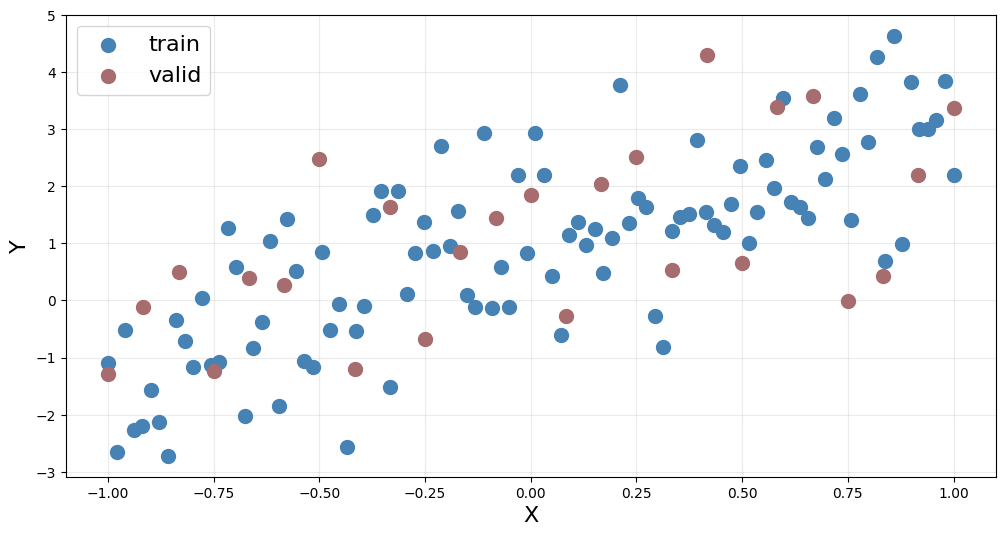

In [3]:
def dataGenerator(n, sigsq=1.0, random_state=1236):
    np.random.seed(random_state)
    x_train = np.linspace(-1, 1, n)
    x_valid = np.linspace(-1, 1, int(n / 4))
    y_train = 1 + 2 * x_train + np.random.randn(n)
    y_valid = 1 + 2 * x_valid + np.random.randn(int(n / 4))
    return x_train, x_valid, y_train, y_valid 

x_train, x_valid, y_train, y_valid = dataGenerator(100)
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.scatter(x_train, y_train, color="steelblue", s=100, label="train")
ax.scatter(x_valid, y_valid, color="#a76c6e", s=100, label="valid")
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlabel("X", fontsize=16)
ax.set_ylabel("Y", fontsize=16)
ax.legend(loc="upper left", fontsize=16);

Since we're going to be implementing things ourselves, we're going to want to prepend the data matrices with a column of ones so we can fit a bias term. We can do this using numpy's

In [4]:
X_train = np.column_stack((np.ones_like(x_train), x_train))
X_valid = np.column_stack((np.ones_like(x_valid), x_valid))

Finally, let's fit a linear regression model with sklearn's LinearRegression class and print the coefficients so we know what we're shooting for.

In [5]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train, y_train)
print("sklearn says the coefficients are ", reg.coef_)

sklearn says the coefficients are  [0.90918343 2.20093262]
